In [2]:
import sklearn
import platform
print('The python version is', platform.python_version())
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The python version is 3.6.5
The scikit-learn version is 0.20.3.


In [3]:
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

# Question 1

On explore la taille et le type des données, on se remémore comment sélectionner seulement les élements d'une classe donnée, etc.

In [108]:
# TODO: A COMPLETER
print("Format de X={},\n format de y={}".format(X.shape, y.shape))
print("Type de X={},\n type de y={}".format(X.dtype, y.dtype))

Format de X=(1797, 64),
 format de y=(1797,)
Type de X=float64,
 type de y=int32


# Question 2

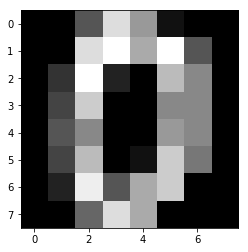

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.imshow(np.reshape(X[0], (8, 8)),
                 interpolation='nearest', cmap=plt.cm.gray)

# Question 3

On affiche le nombre de classes.

In [110]:
# TODO: A COMPLETER
"Le nombre de classes est : {}".format(np.unique(y).shape)

'Le nombre de classes est : (10,)'

# Question 4

On calcule et affiche sous forme d'images les moyennes et variances par classe.

In [111]:
# TODO: A COMPLETER

# n, p = 
# n_classes = 
# mus = np.empty((n_classes, p), dtype=float)
# sigma2s = np.empty((n_classes, p), dtype=float)
# for k in range(n_classes):
#     mus[k] = 
#     sigma2s[k] = 
n, p = X.shape
n_classes = len(np.unique(y))
mus = np.empty((n_classes, p), dtype=float)
sigma2s = np.empty((n_classes, p), dtype=float)
for k in range(n_classes):
    mus[k] = np.mean(X[y==k], axis=0)
    sigma2s[k] = np.var(X[y==k], axis=0)
    #plt.figure(k)
    #plt.imshow(np.reshape(X[k], (8, 8)), cmap=plt.cm.gray, interpolation='nearest')
#plt.show()    

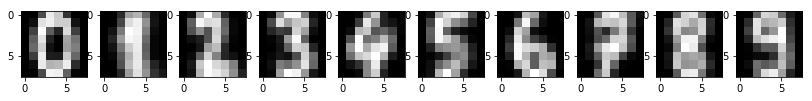

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(14, 2))

for k in range(n_classes):
    axes[k].imshow(np.reshape(mus[k], (8, 8)),
                     interpolation='nearest', cmap=plt.cm.gray)

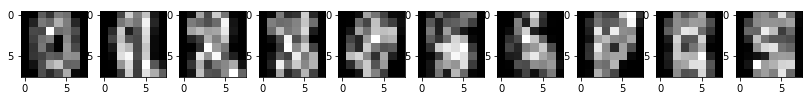

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(14, 2))
for k in range(n_classes):
    axes[k].imshow(np.reshape(sigma2s[k], (8, 8)),
                     interpolation='nearest', cmap=plt.cm.gray)

# Question 5

On normalise les données grâce à `StandardScaler`.

In [114]:
from sklearn.preprocessing import StandardScaler

Cela permet d\'éviter les effets de bord pour certains classifieurs qui se comporteraient mal en cas de données non normales/centrées.

# Question 6

Dans cette question, on va simplement entraîner nos classifieurs (avec les hyperparamètres par défaut pour l'instant) sur toutes nos données et afficher le taux de prédictions correctes sur les données d'apprentissage.

## Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB

# TODO: A COMPLETER
clf1 = GaussianNB()

scaler = StandardScaler()
scaler.fit(X)
X_n = scaler.transform(X)

clf1.fit(X_n, y)
clf1.score(X_n, y)

0.7996661101836394

## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

# TODO: A COMPLETER
clf2 = LogisticRegression()
clf2.fit(X_n, y)
clf2.score(X_n, y)

C:\Users\cyberchinois\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cyberchinois\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9872008903728436

## Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

# TODO: A COMPLETER
clf3 = DecisionTreeClassifier()
clf3.fit(X_n, y)
clf3.score(X_n, y)

1.0

# Question 7

Dans cette question on commente les résultats ci-dessus, on explique pourquoi ce n'est pas une bonne manière d'évaluer un modèle et on mentionne des stratégies plus adaptées.

`Pour un modèle comme le decisiontree, on procède à de l'overfitting.`

# Question 8

Dans cette question on explique quelle doit être la forme de la courbe de validation croisée en fonction de la taille
de l’ensemble d’apprentissage.

In [5]:
y.shape

(1797,)

# Question 9

Dans cette question on utilise la fonction `cross_val_score` pour faire varier la taille de l'ensemble d'apprentissage et vérifier la réponse à la question 8.

In [141]:
from sklearn.model_selection import cross_val_score
cv_values = [2, 3, 10, 50] # nombre de folds à essayer
train_sizes = [n - n / e for e in cv_values] # taille d'apprentissage pour chaque nombre de fold
results = np.empty((len(cv_values), 3))

# TODO: A COMPLETER

# for k, cv in enumerate(cv_values):
#     results[k, 0] = 
#     results[k, 1] = 
#     results[k, 2] = 
clf1 = GaussianNB()
clf2 = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr')
clf3 = DecisionTreeClassifier()
for k, cv in enumerate(cv_values):
    results[k, 0] = np.mean(cross_val_score(clf1, X, y, cv=cv))
    results[k, 1] = np.mean(cross_val_score(clf2, X, y, cv=cv))
    results[k, 2] = np.mean(cross_val_score(clf3, X, y, cv=cv))

C:\Users\cyberchinois\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\cyberchinois\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


On trace une courbe du score en fonction de la taille de l'ensemble d'apprentissage.

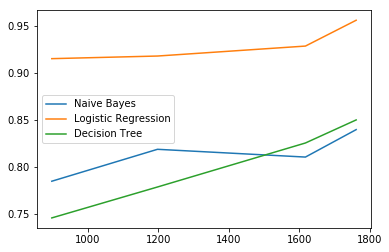

In [142]:
plt.plot(train_sizes, results[:, 0], label='Naive Bayes')
plt.plot(train_sizes, results[:, 1], label='Logistic Regression')
plt.plot(train_sizes, results[:, 2], label='Decision Tree')
plt.legend(loc=6)

# Question 10

Dans cette question on explique quelle doit être la forme de la courbe de performance sur l’ensemble d’apprentis-
sage en fonction de sa taille.

# Question 11

Dans cette question on vérifie la réponse à la question 10 à l'aide de la fonction `plot_learning_curve`.

In [144]:
def learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    """Learning curve.

    Determines cross-validated training and test scores for different training
    set sizes.

    A cross-validation generator splits the whole dataset k times in training
    and test data. Subsets of the training set with varying sizes will be used
    to train the estimator and a score for each training subset size and the
    test set will be computed. Afterwards, the scores will be averaged over
    all k runs for each training subset size.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    cv : cross-validation generator
        Cross-validation object, see sklearn.model_selection module
        for the list of possible objects

    train_sizes : array-like, shape (n_ticks,), dtype float
        Relative numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        (default: np.linspace(0.1, 1.0, 5))

    Returns
    -------
    train_sizes_abs : array, shape (n_unique_ticks,), dtype int
        Numbers of training examples that has been used to generate the
        learning curve. Note that the number of ticks might be less
        than n_ticks because duplicate entries will be removed.

    train_scores : array, shape (n_ticks, n_cv_folds)
        Scores on training sets.

    test_scores : array, shape (n_ticks, n_cv_folds)
        Scores on test set.
    """

    n_max_training_samples = len(list(cv.split(X))[0][0])
    train_sizes_abs = (train_sizes * n_max_training_samples).astype(int)

    train_scores = []
    test_scores = []

    for train, test in cv.split(X):
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        this_train_scores = []
        this_test_scores = []
        for n in train_sizes_abs:
            estimator.fit(X_train[:n], y_train[:n])
            this_train_scores.append(estimator.score(X_train[:n], y_train[:n]))
            this_test_scores.append(estimator.score(X_test, y_test))

        train_scores.append(this_train_scores)
        test_scores.append(this_test_scores)

    return train_sizes_abs, np.transpose(train_scores), np.transpose(test_scores)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


C:\Users\cyberchinois\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\cyberchinois\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

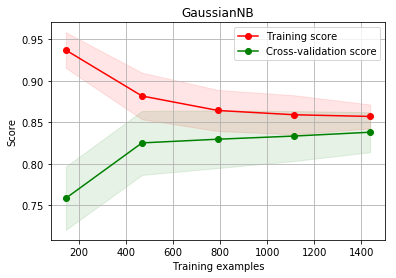

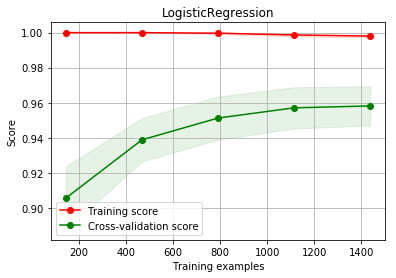

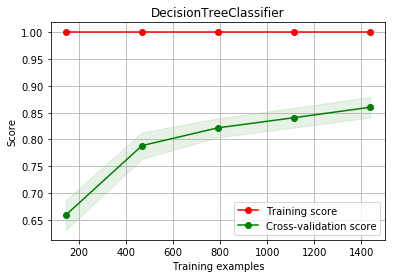

In [148]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
clf1 = GaussianNB()
clf2 = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr')
clf3 = DecisionTreeClassifier()

# TODO: A COMPLETER

plot_learning_curve(clf1, "GaussianNB", X, y, ylim=None, cv=cv,
                        train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(clf2, "LogisticRegression", X, y, ylim=None, cv=cv,
                        train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(clf3, "DecisionTreeClassifier", X, y, ylim=None, cv=cv,
                        train_sizes=np.linspace(.1, 1.0, 5))

# Question 12

Dans cette question on fait la même chose que pour la question 11 avec un SVM.

<module 'matplotlib.pyplot' from 'C:\\Users\\cyberchinois\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

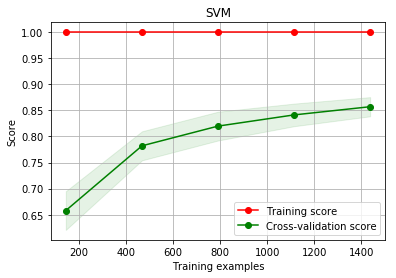

In [149]:
from sklearn.svm import SVC
clf_SVM = SVC(gamma=0.01)

# TODO: A COMPLETER
plot_learning_curve(clf, "SVM", X, y, ylim=None, cv=cv,
                        train_sizes=np.linspace(.1, 1.0, 5))

# Question 13

Dans cette question on utilise un schéma de validation pour sélectionner les hyperparamètres des modèles, par exemple le paramètre de profondeur maximale de l'arbre (`max_depth`) pour les arbres de décision.

In [161]:
from sklearn.model_selection import GridSearchCV

# TODO: A COMPLETER

clf = DecisionTreeClassifier()
max_depth_grid = {'max_depth' : [1, 10, 50, 100]}
gs = GridSearchCV(clf, param_grid=max_depth_grid)
gs.fit(X, y)
plt.plot(gs.cv_result_['mean_test_score'])

C:\Users\cyberchinois\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


AttributeError: 'GridSearchCV' object has no attribute 'cv_result_'

In [155]:
import pandas as pd
pd.DataFrame(cv_result)

ValueError: DataFrame constructor not properly called!

# Question 14

Dans cette question on expérimente avec les forêts aléatoires en réglant le nombre d'arbres.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier()

# TODO: A COMPLETER
